# Table on Content
    1. Importing Libraries & Instacart data
    2. Busiest Days and Hours of the Week
      2.1. Busiest Days of the Week
      2.2. Busiest Hours of the Week    
    3. Spending per Hours
      3.1. Type of Products per Hour
    4. Distribution of Price Ranges
    5. Distribution of Products
      5.1. Type of Products per Age Group
      5.2. Type of Products per Marital Status
      5.3. Type of Products per Region
    6. Customer Profiles
      6.1. Frequency
      6.2. Loyalty
      6.3. Regional  
    7. Exporting dataframe

# 1. Importing Libraries & Instacart data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path
path = r'/Users/Dulce/12-2023 Instacart Basket Analysis'

In [4]:
# Import final_df
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart.pkl'))

In [5]:
# Create a color palette with distinct colors
colors = ['#FFB6C1', '#FF89AA', '#FF2F7B', '#FF6B9A']

In [6]:
instacart.columns

Index(['product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'user_id', 'eval_set', 'quantity', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'Busy_day', 'Busy_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_payment',
       'spender_type_flag', 'median_days_since_prior_order', 'frequency_flag',
       'State', 'Age', 'Children', 'Marital_Status', 'income', 'region',
       'activity_flag', 'department', '_merge', 'Status', 'Age_Group',
       'Income_Group', 'Dependance', 'Customer_Profile', 'Prod_Categ'],
      dtype='object')

# 2. Busiest Days and Hours of the Week
"The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders."

## 2.1. Busiest Days of the Week


In [12]:
# Map numerical values to names of the days
instacart['orders_day_of_week'] = instacart['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [15]:
# Check frequency of order per each day
day_counts = instacart['orders_day_of_week'].value_counts(dropna = False)
day_counts

orders_day_of_week
NaN    32404859
Name: count, dtype: int64

In [14]:
# Calculate percentages
days_percentages = (day_counts / len(instacart) * 100).round(0).astype(str) + '%'
days_percentages

orders_day_of_week
NaN    100.0%
Name: count, dtype: object

IndexError: index 0 is out of bounds for axis 0 with size 0

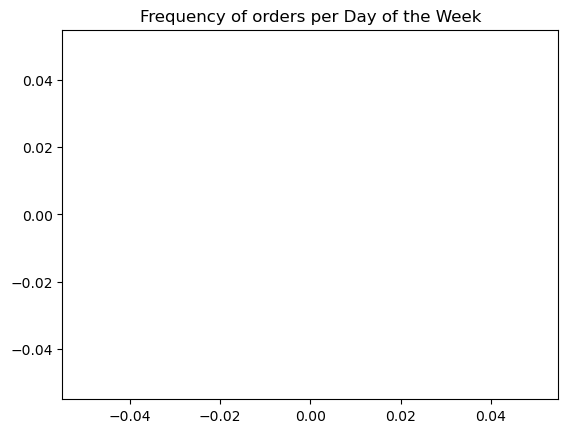

In [11]:
# Bar Chart: Frequency of Orders per Day of the Week
bar_busy_days = instacart['orders_day_of_week'].value_counts().loc[[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.barh(
    title='Frequency of orders per Day of the Week',
    color=colors[0])
# Add title to axis Y
plt.ylabel('Days of the Week')

In [ ]:
# Export Bar Chart
bar_busy_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busy_days.png'))

## 2.2. Busiest Hours of the Week

In [ ]:
# Check frequency of order per Hour
hour_counts = instacart['order_hour_of_day'].value_counts(dropna = False)

In [ ]:
# Calculate percentages
hours_percentages = (hour_counts / len(instacart) * 100).round(0).astype(str) + '%'
hours_percentages

In [ ]:
# Bar Chart: Frequency of Orders per Hour
bar_busy_hours = instacart['order_hour_of_day'].value_counts().sort_values(ascending=True).plot.barh(
    title='Frequency of orders per Hour',
    color=colors[0])
# Add title to axis Y
plt.ylabel('Hour of the Day')

In [ ]:
# Export Bar Chart
bar_busy_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_busy_hours.png'))

# 3. Spending per Hours
"They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times."

In [ ]:
# Create a list holding True/False values to the test np.random.rand()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(instacart)) <= 0.7

In [ ]:
# Split your dev: Store 70% within Big-Dataframe and 30% within Small-Dataframe
big = instacart[dev]
small = instacart[~dev]

In [ ]:
# Reducing your samples to only those columns necessary for the chart spending per hours
small_spend_hours = small[['order_hour_of_day','prices']]
big_spend_hours = big[['order_hour_of_day','prices']]

In [ ]:
# Create the Line Chart "spending per hours" from small_spend_hours
line_spend_hours = sns.lineplot(data = small_spend_hours, x = 'order_hour_of_day',y = 'prices', color='#FF2F7B')
# Set title and labels
plt.title('Spending per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Spending')

In [ ]:
# Export Line Chart "spending per hours"
line_spend_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_spend_hours.png'))

# 4. Distribution of Price Ranges
"Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts."

In [ ]:
# Check frequency of Price Ranges
price_ranges_counts = instacart['price_range_loc'].value_counts(dropna = False)

In [ ]:
# Calculate percentages
price_ranges_percentages = (price_ranges_counts / len(instacart) * 100).round(0).astype(str) + '%'
price_ranges_percentages

In [ ]:
# Bar Chart: Distribution of Price Ranges
bar_prices_range = instacart['price_range_loc'].value_counts().sort_values(ascending=True).plot.barh(
    title='Distribution of Price Ranges',
    color=colors[0])
# Add title to axis Y
plt.ylabel('Price Ranges')

In [ ]:
# Export Line Chart "spending per hours"
bar_prices_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price Ranges.png'))

# 5. Distribution of Products
"Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders."

In [ ]:
# Create  for different Products
Perishables = ['produce', 'meat seafood', 'dairy eggs']
Breakfast = ['bakery', 'breakfast']
Party = ['beverages', 'alcohol','snacks']
Household = ['household', 'personal care', 'babies', 'pets']
Frozen = ['frozen']
Staples = ['pantry', 'canned goods', 'dry goods pasta']
Gourmet = ['international', 'deli']
Others = ['other', 'missing', 'bulk']


In [ ]:
# Derive new variable "Prod_Categ" and placing lists
instacart.loc[instacart['department'].isin(Perishables), 'Prod_Categ'] = 'Perishables'
instacart.loc[instacart['department'].isin(Breakfast), 'Prod_Categ'] = 'Breakfast'
instacart.loc[instacart['department'].isin(Party), 'Prod_Categ'] = 'Party'
instacart.loc[instacart['department'].isin(Household), 'Prod_Categ'] = 'Household'
instacart.loc[instacart['department'].isin(Frozen), 'Prod_Categ'] = 'Frozen'
instacart.loc[instacart['department'].isin(Staples), 'Prod_Categ'] = 'Staples'
instacart.loc[instacart['department'].isin(Gourmet), 'Prod_Categ'] = 'Gourmet'
instacart.loc[instacart['department'].isin(Others), 'Prod_Categ'] = 'Others'

In [ ]:
category_counts = instacart['Prod_Categ'].value_counts(dropna = False)

In [ ]:
# Calculate percentages
category_percentages = (category_counts / len(instacart) * 100).round(0).astype(str) + '%'
category_percentages

In [ ]:
# Bar Chart: Frequency of Category of Products
bar_category = instacart['Prod_Categ'].value_counts().sort_values(ascending=True)

# Calculate percentages
percentages = (bar_category / bar_category.sum()) * 100

# Plot horizontal bar chart
bar_plot = bar_category.plot.barh(
    title='Frequency of Category of Products',
    color=colors[0])

# Add percentages to the bars
for index, value in enumerate(bar_category):
    percentage = percentages.iloc[index]
    bar_plot.text(value, index, f'{percentage:.1f}%', va='center')

# Add title to axis Y
plt.ylabel('Categories')

# Show the plot
plt.show()

In [ ]:
# Export Bar Chart: Frequency of Category of Products
bar_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Frequency of Categories.png'))

In [ ]:
# Bar Chart: Frequency of Products
bar_products = instacart['department'].value_counts().sort_values(ascending=True).plot.barh(
    title='Frequency of Products',
    color=colors[0])
# Add title to axis Y
plt.ylabel('Products')

In [ ]:
# Export Bar Chart: Frequency of Products
bar_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Frequency of Products.png'))

## 5.1. Type of Products per Age Group
"Is there a connection between age in terms of ordering
habits?"

In [17]:
crosstab_Categ_Age_prop = pd.crosstab(index=instacart['Prod_Categ'],
                             columns=instacart['Age_Group'],
                             normalize='columns')*100
crosstab_Categ_Age_prop

Age_Group,Adult,Senior,Young
Prod_Categ,,,
Breakfast,5.783981,5.773039,5.823076
Frozen,6.870924,6.935857,6.888056
Gourmet,4.074260,4.070856,4.084450
Household,5.275257,5.261585,5.272459
Others,0.429195,0.428047,0.446536
Party,17.698040,17.680012,17.637935
Perishables,48.127812,48.097220,48.039165
Staples,11.740532,11.753384,11.808324


In [33]:
# Group by Age-Group and Category of Products
Categ_Age =instacart.groupby(['Prod_Categ', 'Age_Group']).size().unstack()

Text(0, 0.5, 'Category of Products')

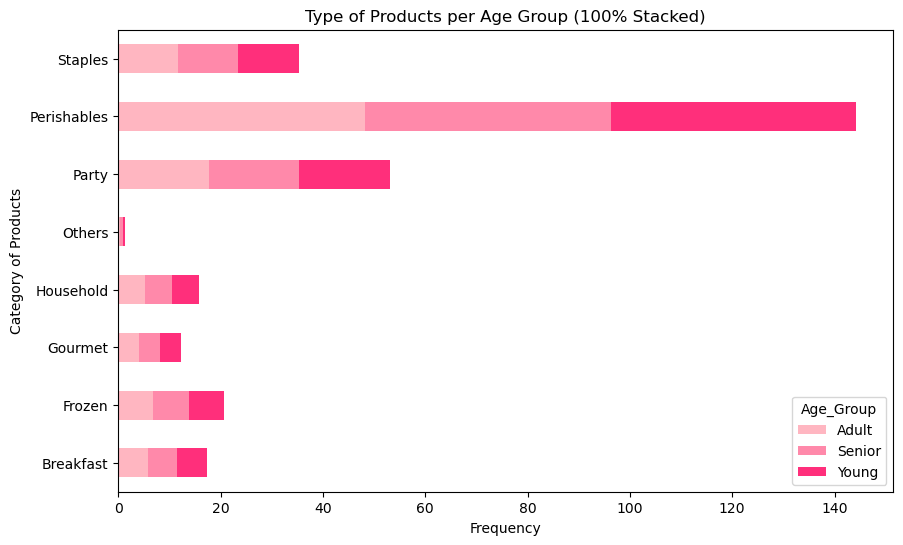

In [18]:
# Bar Chart: Type of Products per Age Group (100% Stacked Column)
bar_Categ_Age_percent = crosstab_Categ_Age_prop.plot.barh(stacked=True, 
                                                  color=colors, 
                                                  title='Type of Products per Age Group (100% Stacked)',
                                                  figsize=(10, 6))
# Add title to axis Y
plt.xlabel('Frequency')
plt.ylabel('Category of Products')

In [35]:
# Export Bar Chart: Category of Products per Age Group
bar_Categ_Age_percent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Category of Products per Age Group.png'))

## 5.2. Type of Products per Marital Status
"Is there a connection between age and family status in terms of ordering
habits?"

In [36]:
# Group by Marital Status and Category of Products
Categ_Status =instacart.groupby(['Prod_Categ', 'Status']).size().unstack()

Text(0, 0.5, 'Marital Status')

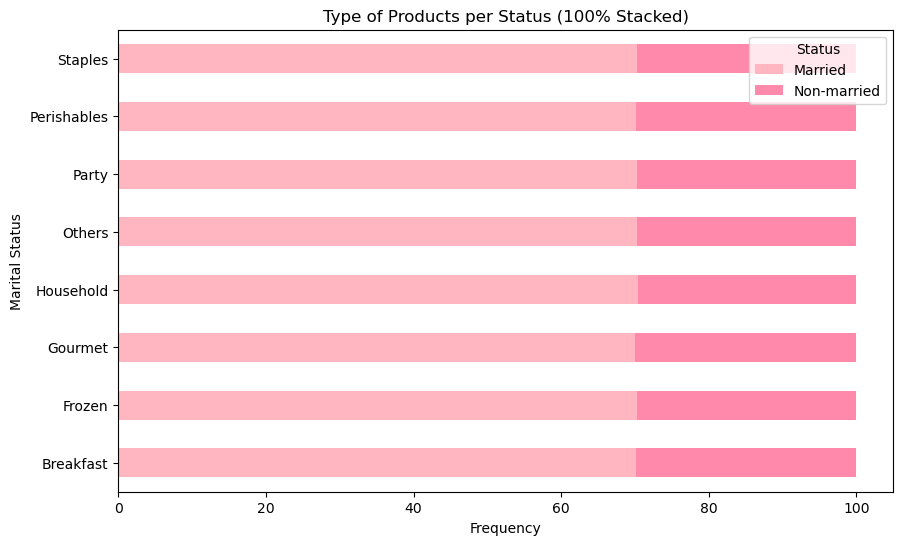

In [37]:
# Normalize the data to convert to 100% stacked
Categ_Status_percent = Categ_Status.div(Categ_Status.sum(axis=1), axis=0) * 100

# Bar Chart: Type of Products per Status (100% Stacked Column)
Categ_Status_percent = Categ_Status_percent.plot.barh(stacked=True, 
                                                  color=colors, 
                                                  title='Type of Products per Status (100% Stacked)',
                                                  figsize=(10, 6))
# Add title to axis Y
plt.xlabel('Frequency')
plt.ylabel('Marital Status')

In [38]:
# Export Bar Chart: Category of Products per Status
Categ_Status_percent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Category of Products per Marital Status.png'))

## 5.3. Type of Products and Loyalty per Region
Are there differences in ordering habits based on a customer’s region?

In [19]:
# Create crosstab for Loyalty Flag per Region
crosstab_loyalty_region = pd.crosstab(instacart['loyalty_flag'], instacart['region'], 
                                      dropna=False, normalize='columns')
crosstab_loyalty_region

region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,0.312449,0.321836,0.315593,0.32108
New customer,0.193828,0.192252,0.192219,0.19255
Regular customer,0.493724,0.485912,0.492188,0.48637


Text(0, 0.5, 'Region')

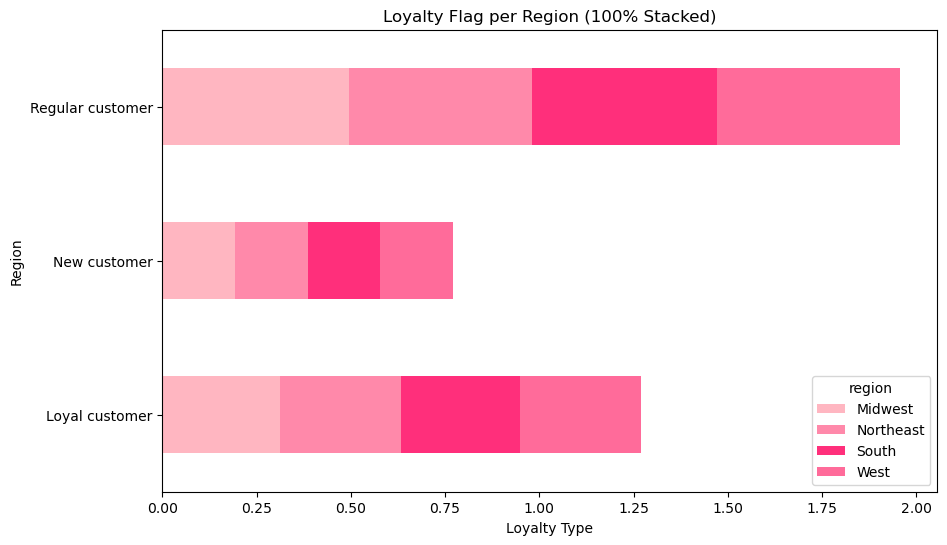

In [20]:
# Bar Chart: Loyalty Flag per Region (100% Stacked Column)
Loyal_Region_percent = crosstab_loyalty_region.plot.barh(stacked=True, 
                                                  color=colors, 
                                                  title='Loyalty Flag per Region (100% Stacked)',
                                                  figsize=(10, 6))
# Add title to axis Y
plt.xlabel('Loyalty Type')
plt.ylabel('Region')

In [39]:
# Group by Loyalty Flag per Region
Loyal_Region =instacart.groupby(['loyalty_flag', 'region']).size().unstack()

Text(0, 0.5, 'Region')

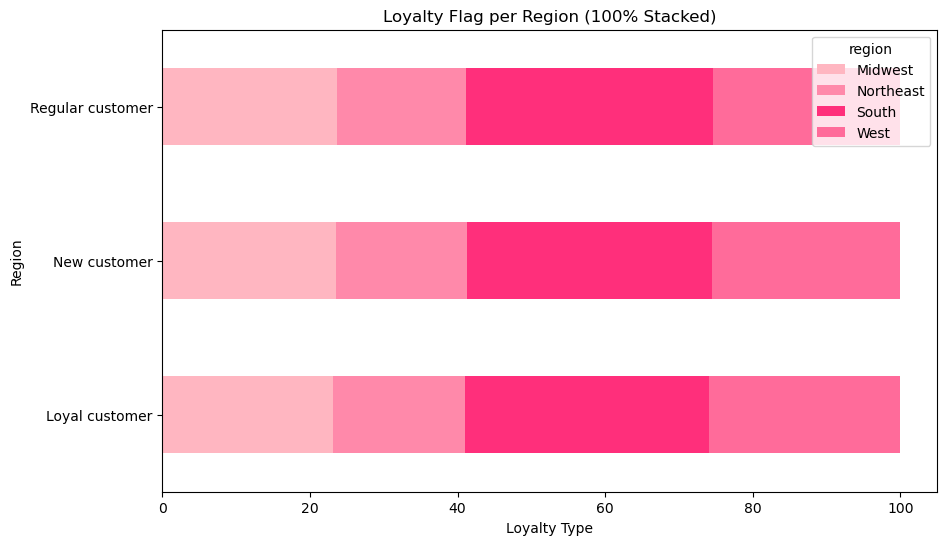

In [42]:
# Normalize the data to convert to 100% stacked
Loyal_Region_percent = Loyal_Region.div(Loyal_Region.sum(axis=1), axis=0) * 100

# Bar Chart: Loyalty Flag per Region (100% Stacked Column)
Loyal_Region_percent = Loyal_Region_percent.plot.barh(stacked=True, 
                                                  color=colors, 
                                                  title='Loyalty Flag per Region (100% Stacked)',
                                                  figsize=(10, 6))
# Add title to axis Y
plt.xlabel('Loyalty Type')
plt.ylabel('Region')

In [43]:
# Export Bar Chart: Loyalty Flag per Region
Loyal_Region_percent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty Flag per Region.png'))

In [44]:
# Group by Region and Category of Products
Categ_Region =instacart.groupby(['Prod_Categ', 'region']).size().unstack()

Text(0, 0.5, 'Region')

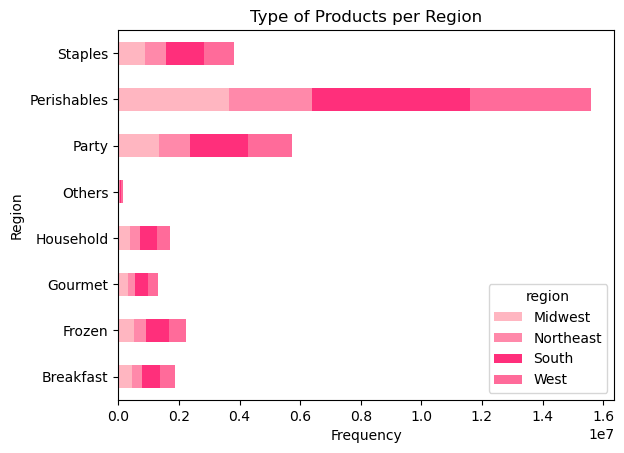

In [45]:
# Bar Chart: Type of Products per Region
bar_Categ_Region = Categ_Region.plot.barh(stacked = True, 
                                    color=colors,
                                    title='Type of Products per Region')
# Add title to axis Y
plt.xlabel('Frequency')
plt.ylabel('Region')

In [46]:
# Export Bar Chart: Category of Products per Region
bar_Categ_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Category of Products per Region.png'))

# 6. Customer Profiles

In [47]:
# Check frequency of Loyalty Flag
cust_prof_counts = instacart['Customer_Profile'].value_counts(dropna = False)
# Calculate percentages
cust_prof_percentages = (cust_prof_counts / len(instacart) * 100).round(0).astype(str) + '%'
cust_prof_percentages

Customer_Profile
Married, Senior, High Income        18.0%
Married, Adult, High Income         16.0%
Married, Adult, Mid Income          15.0%
Non-married, Young, Mid Income       8.0%
Married, Young, Mid Income           8.0%
Non-married, Senior, High Income     6.0%
Married, Senior, Mid Income          6.0%
Non-married, Adult, High Income      5.0%
Non-married, Adult, Mid Income       5.0%
Married, Adult, Low Income           4.0%
Married, Senior, Low Income          2.0%
Non-married, Senior, Mid Income      2.0%
Non-married, Young, Low Income       2.0%
Married, Young, Low Income           1.0%
Non-married, Adult, Low Income       1.0%
Non-married, Senior, Low Income      1.0%
Non-married, Young, High Income      0.0%
Married, Young, High Income          0.0%
Name: count, dtype: object

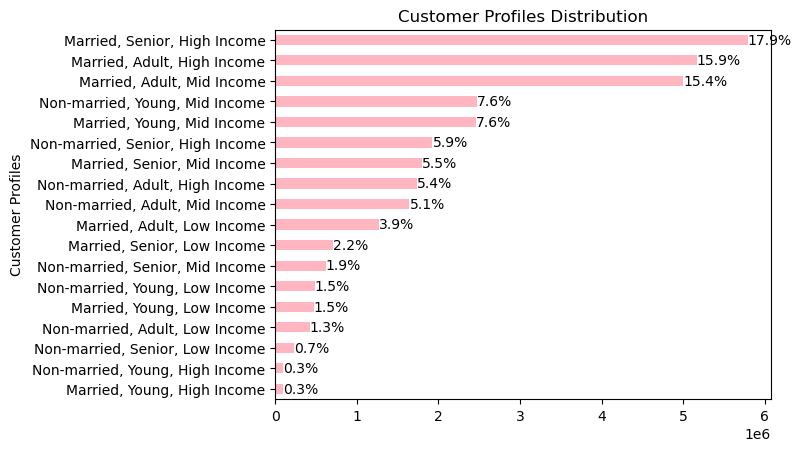

In [48]:
# Create Bar Chart for Distribution of Customer Profiles
bar_distrib_prof = instacart['Customer_Profile'].value_counts().sort_values(ascending=True)

# Calculate percentages
percentages_prof = (bar_distrib_prof / bar_distrib_prof.sum()) * 100

# Plot horizontal bar chart
bar_plot_prof = bar_distrib_prof.plot.barh(
    title='Customer Profiles Distribution',
    color=colors[0])

# Add percentages to the bars
for index, value in enumerate(bar_distrib_prof):
    percentage = percentages_prof.iloc[index]
    bar_plot_prof.text(value, index, f'{percentage:.1f}%', va='center')

# Add title to axis Y
plt.ylabel('Customer Profiles')

# Show the plot
plt.show()

In [49]:
bar_plot_prof.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profiles with Percentages.png'))

## 6.1. Frequency

In [50]:
# Group by Price Category and Loyalty Flag
Price_Loyalty =instacart.groupby(['loyalty_flag', 'price_range_loc']).size().unstack()

Text(0, 0.5, 'Pricing Items')

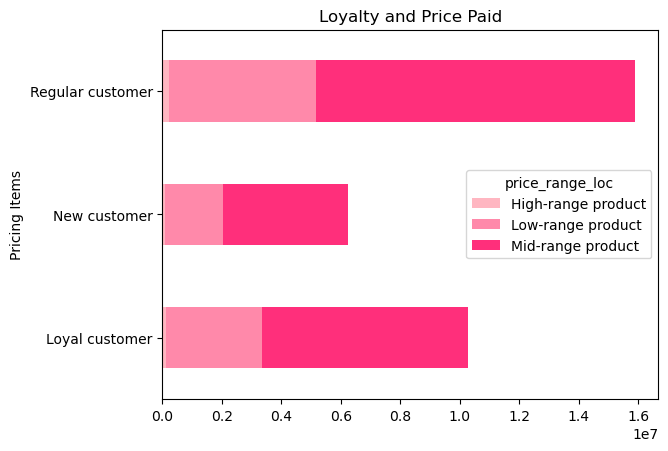

In [51]:
# Bar Chart: Price Category and Loyalty Flag
bar_Price_Loyalty = Price_Loyalty.plot.barh(stacked = True, 
                                    color=colors,
                                    title='Loyalty and Price Paid')
# Add title to axis Y
plt.ylabel('Pricing Items')

In [52]:
# Export Bar Chart: Distribution of Frequency
bar_Price_Loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price Category and Loyalty Flag.png'))

In [53]:
# Create crosstab for Loyalty and Price Categories
crosstab_loyalty_pricing = pd.crosstab(instacart['loyalty_flag'], instacart['price_range_loc'], dropna=False, normalize='column') * 100

# Round to zero decimals and add '%' at the end
crosstab_loyalty_pricing = crosstab_loyalty_pricing.round(0).astype(int).astype(str) + '%'
crosstab_loyalty_pricing

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,0%,10%,21%
New customer,0%,6%,13%
Regular customer,1%,15%,33%


## 6.2. Loyalty

In [54]:
# Create crosstab for Loyalty and Spender Type Flags
crosstab_loyalty_spender = pd.crosstab(instacart['loyalty_flag'], instacart['spender_type_flag'], dropna=False, normalize='all') * 100

# Round to zero decimals and add '%' at the end
crosstab_loyalty_spender = crosstab_loyalty_spender.round(0).astype(int).astype(str) + '%'
crosstab_loyalty_spender

spender_type_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,1%,31%
New customer,0%,19%
Regular customer,1%,48%


In [55]:
# Group by Spender Type and Loyalty Flag
Spender_Loyalty =instacart.groupby(['loyalty_flag', 'spender_type_flag']).size().unstack().sort_values(by='loyalty_flag', ascending=False)

Text(0.5, 0, 'Loyalty Type')

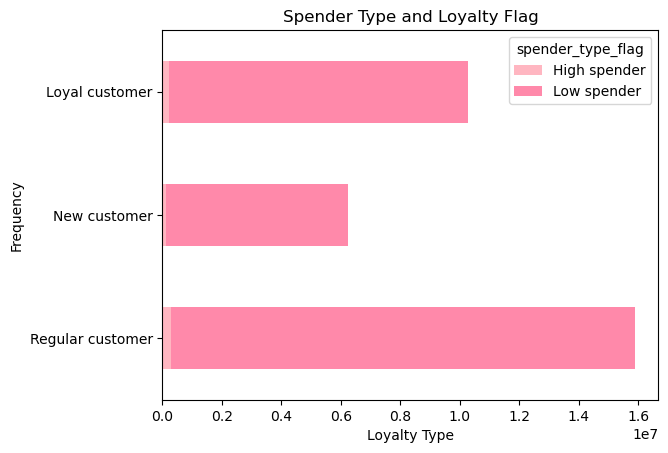

In [56]:
# Bar Chart: Spender Type and Loyalty Flag
bar_Spender_Loyalty = Spender_Loyalty.plot.barh(stacked = True, 
                                    color=colors,
                                    title='Spender Type and Loyalty Flag')
# Add title to axis Y
plt.ylabel('Frequency')
plt.xlabel('Loyalty Type')

In [57]:
# Export Bar Chart: Spender Type and Loyalty Flag
bar_Spender_Loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spender Type and Loyalty Flag.png'))

In [58]:
# Group by Customer Profiles and Loyalty Flag
Profile_Loyalty =instacart.groupby(['Customer_Profile', 'loyalty_flag']).size().unstack().sort_values(by='Customer_Profile', ascending=False)

Text(0.5, 0, 'Loyalty Type')

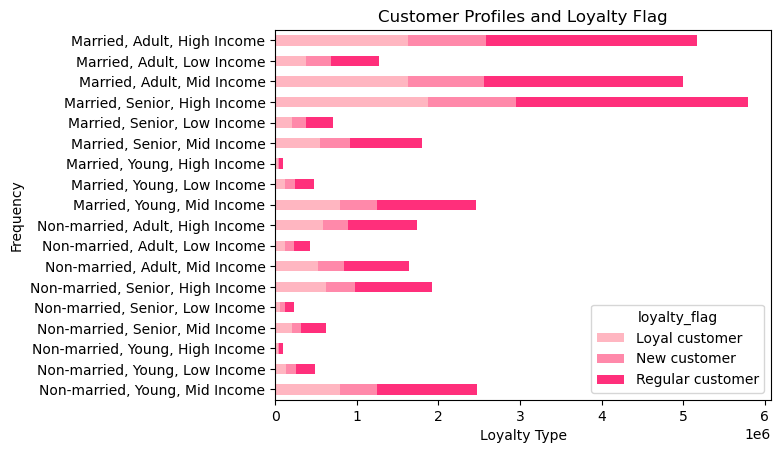

In [59]:
# Bar Chart: Customer Profiles and Loyalty Flag
bar_Profile_Loyalty = Profile_Loyalty.plot.barh(stacked = True, 
                                    color=colors,
                                    title='Customer Profiles and Loyalty Flag')
# Add title to axis Y
plt.ylabel('Frequency')
plt.xlabel('Loyalty Type')

In [60]:
# Export Bar Chart: Customer Profiles and Loyalty Flag
bar_Profile_Loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profiles and Loyalty.png'))

## 6.3. Regional

In [61]:
# Group by Customer Profiles and Region
Profile_Region =instacart.groupby(['Customer_Profile', 'region']).size().unstack().sort_values(by='Customer_Profile', ascending=False)

Text(0, 0.5, 'Region')

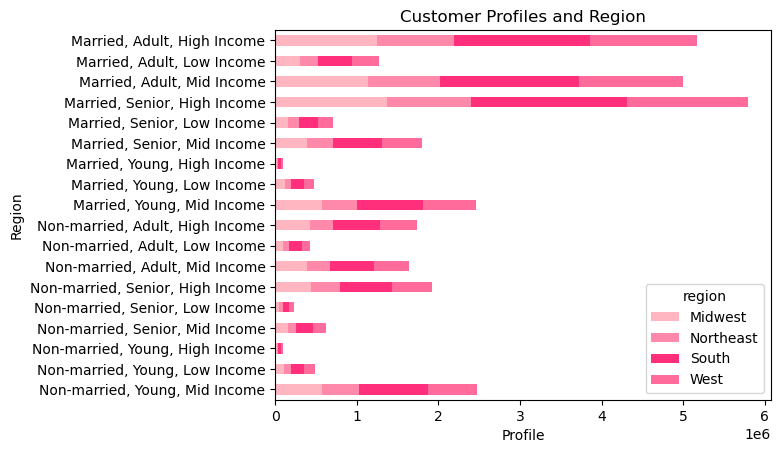

In [62]:
# Bar Chart: Customer Profiles and Region
bar_Profile_Region = Profile_Region.plot.barh(stacked = True, 
                                    color=colors,
                                    title='Customer Profiles and Region')
# Add title to axis Y
plt.xlabel('Profile')
plt.ylabel('Region')

In [63]:
# Export Bar Chart: Customer Profiles and Region
bar_Profile_Region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profiles and Region.png'))

## 6.4. Type of Products

In [64]:
# Group by Customer Profiles and Category of Products
Profile_Categ_Prod =instacart.groupby(['Customer_Profile', 'Prod_Categ']).size().unstack().sort_values(by='Customer_Profile', ascending=False)

Text(0, 0.5, 'Category of Products')

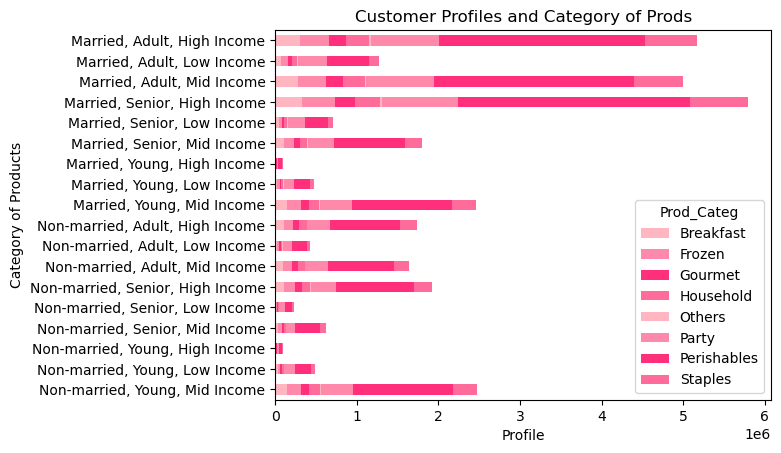

In [65]:
# Bar Chart: Customer Profiles and Category of Products
bar_Profile_Categ_Prod = Profile_Categ_Prod.plot.barh(stacked = True, 
                                    color=colors,
                                    title='Customer Profiles and Category of Prods')
# Add title to axis Y
plt.xlabel('Profile')
plt.ylabel('Category of Products')

In [66]:
# Export Bar Chart: Customer Profiles and Category of Products
bar_Profile_Categ_Prod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profiles and Category of Products.png'))

# 7. Exporting dataframe

In [67]:
# Export instacart dataframe
instacart.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart.pkl'))